In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import geopandas as gpd

In [2]:
url = 'https://github.com/eueung/fireloc/raw/master/VNP14IMGTDL_NRT_SouthEast_Asia_24h.csv'
df  = pd.read_csv(url)

In [3]:
#df.shape
#df.dtypes
#df.isna().sum()
df.tail()

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,confidence,version,bright_ti5,frp,daynight
5387,-7.24001,109.21642,296.0,0.39,0.44,2019-11-07,1818,N,nominal,1.0NRT,277.7,0.6,N
5388,-7.33078,108.52215,309.2,0.53,0.42,2019-11-07,1818,N,nominal,1.0NRT,290.4,1.4,N
5389,-7.84908,111.96459,302.6,0.60,0.53,2019-11-07,1818,N,nominal,1.0NRT,287.3,1.5,N
5390,-7.69616,108.99609,308.0,0.38,0.43,2019-11-07,1818,N,nominal,1.0NRT,291.8,2.1,N
5391,-7.70418,108.99492,316.9,0.38,0.43,2019-11-07,1818,N,nominal,1.0NRT,293.3,2.4,N


---

In [4]:
gdf   = gpd.GeoDataFrame(df,crs={'init': 'epsg:4326'}, geometry=gpd.points_from_xy(df.longitude, df.latitude))
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

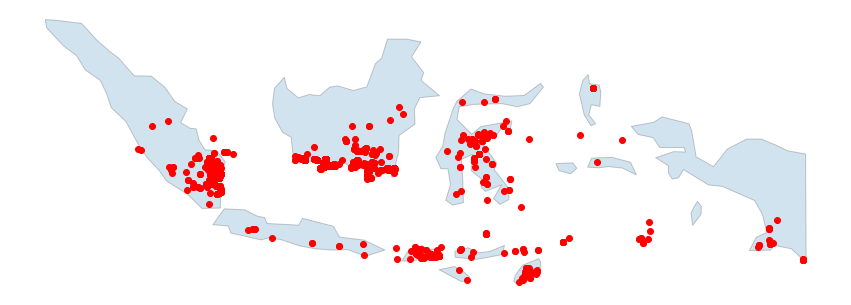

In [5]:
var_gdf = gdf[(gdf.confidence=='high')|(gdf.frp>10)].copy()

ax = world[world.name == 'Indonesia'].plot(figsize=(15, 10), alpha=0.2, edgecolor='k')
ax.set_axis_off()
var_gdf.plot(ax=ax, color='red')
plt.show()

---

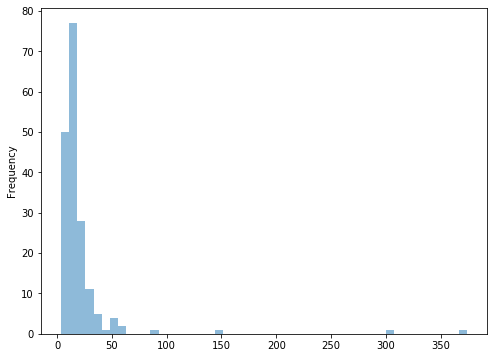

In [6]:
df[df['confidence']=='high']['frp'].plot(figsize=(8, 6),kind='hist',bins=50, alpha=0.5)
#df[df['confidence']=='low']['frp'].plot(figsize=(8, 6),kind='hist',bins=50, alpha=0.5)
#df[df['confidence']=='low']['frp'].plot(figsize=(8, 6),kind='kde')
plt.show()

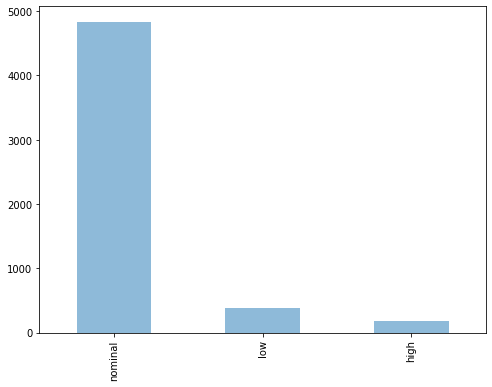

In [7]:
#df['acq_date'].value_counts().plot(figsize=(8, 6),kind='bar', alpha=0.5)
#df['daynight'].value_counts().plot(figsize=(8, 6),kind='bar', alpha=0.5)
df['confidence'].value_counts().plot(figsize=(8, 6),kind='bar', alpha=0.5)
plt.show()

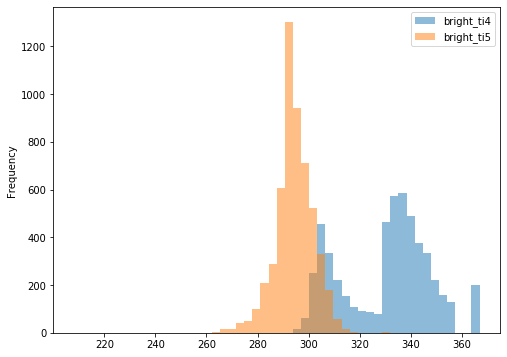

In [8]:
df[['bright_ti4','bright_ti5']].plot(figsize=(8, 6),kind='hist',bins=50, alpha=0.5)
plt.show()

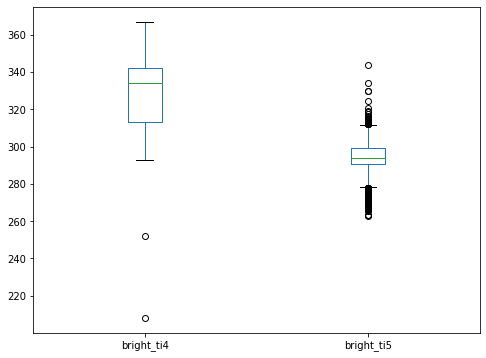

In [9]:
df[['bright_ti4','bright_ti5']].plot(figsize=(8, 6),kind='box')
plt.show()

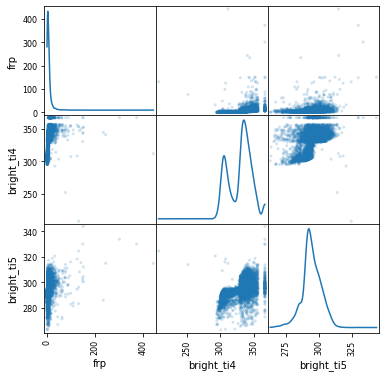

In [10]:
#df.plot(figsize=(8, 6),kind='scatter',x='frp',y='bright_ti4')
#df.plot(figsize=(8, 6),kind='scatter',x='frp',y='bright_ti5')

from pandas.plotting import scatter_matrix
scatter_matrix(df[['frp','bright_ti4','bright_ti5']], alpha=0.2, figsize=(6, 6), diagonal='kde')
plt.show()